In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv as read
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt

In [2]:
class Solver:
    def __init__(self, data,y_name, lb_ecnoder_columns=[], dummies_columns=[]):
        self.data=copy.deepcopy(data)
        self.lb_ecnoder_columns = lb_ecnoder_columns
        self.dummies_columns = dummies_columns
        self.y_name = y_name
        self.X = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.X_train = pd.DataFrame()
        self.y = pd.DataFrame()
        self.y_test = pd.DataFrame()
        self.y_train = pd.DataFrame()
        self._data_prep()

        
    def _data_prep(self):
        #Подготовим данные (проработаем категориальные признаки, разобьем на тестовую и обучающую выборки)
        self._ecnoder(self.lb_ecnoder_columns)
        self.data = pd.get_dummies( self.data, columns = self.dummies_columns )
        self.y = self.data[self.y_name]
        self.X = copy.deepcopy(self.data)
        del self.X[self.y_name]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=85,stratify=self.y)
    def _ecnoder(self,lb_ecnoder_columns):
        for i in lb_ecnoder_columns:
            le = LabelEncoder()
            le.fit(self.data[i])
            self.data[i]=le.transform(self.data[i])

    def LogisticRegression_model(self):
        model_name = 'LogisticRegression'
        
        #Используем StandardScaler() для стандартизации
        model = make_pipeline(
        StandardScaler(),
        LogisticRegression())
        
        #Обучаем модель
        model.fit(self.X_train, self.y_train)
        #Выводим точность
        print(f'accuracy of {model_name} = {model.score(self.X_test, self.y_test)}')
        predictions = model.predict_proba(self.X_test)
        print(f'roc_auc_score of {model_name} = {roc_auc_score(self.y_test, predictions[:, 1])}')



In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data = data.drop(['Name','Sex','Ticket','Cabin','Embarked'], axis=1)

In [6]:
data=data.dropna(axis=0,how='any')

In [7]:
X=data[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]
y=data['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [9]:
model=LogisticRegression(max_iter=1000)

In [10]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
print(f'accuracy {model.score(X_test, y_test)}')
print(f'roc_auc_score  = {roc_auc_score(y_test, predictions[:, 1])}')

accuracy 0.6923076923076923
roc_auc_score  = 0.7567951318458418


In [13]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#Процент потерянных данных по столбцам
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [16]:
#Процент утерянных данных
data.isnull().sum().sum()/len(data)/len(data.columns)*100

8.099513655069211

In [17]:
# Номер билета присваивается случайно и нет никакой закономерности между ним и другими признаками
del data['Ticket']
# Номер пассажира присваивается случайно и нет никакой закономерности между ним и другими признаками
del data['PassengerId']
# Имя человека также не играет роли
del data['Name']

In [18]:
len(data['Cabin'].unique())

148

In [19]:
#Имеет слишком много уникальных значений, поэтому решил не брать
del data['Cabin']

In [20]:
#Но при желании можно создать дополнительный класс признака Cabin который будет обозначать что значение в нем отсутствует
#data['Cabin'] = data['Cabin'].fillna('NA')

<AxesSubplot:>

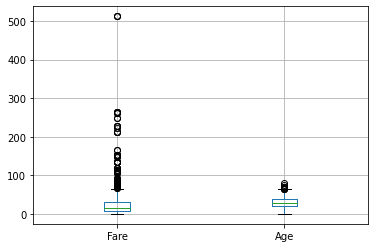

In [21]:
#Для непрерывных некатегориальных признаков просмотрим на выбросы
data.boxplot(column=['Fare','Age'])

In [22]:
#Так как есть ярко выраженные аномалии, необходимо их убрать
#Установим во сколько раз отклонение от межквартирного диапазона считатся аномалией и заменим выбросы на np.nan 
#я остановился на значении 10
treshhold = 10
for x in ['Fare','Age']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(treshhold*intr_qr)
    min = q25-(treshhold*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

<AxesSubplot:>

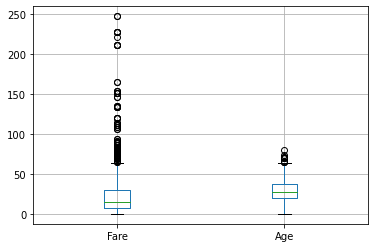

In [23]:
#Проверим
data.boxplot(column=['Fare','Age'])

In [24]:
#Заполним пустые ячейки
#Для категориальных признаков модой
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
#Для некатегориальных признаков медианой
data['Fare'].fillna(data['Fare'].median(), inplace = True)

In [25]:
#Добавим новый признак разбивая 'Fare' на 3 группы
data['Fare_Category'] = pd.cut(data['Fare'], bins=[-0.1,10,50,100], labels=['Low','Mid','High'])

In [26]:
#С возрастом поступим иначе
#Разобьем людей на группы (напрмер по признаку пола) в каждой группе вычислим медиану и основываясь на этой медиане заполним пропуски в группе
grb_med = data.groupby(['Sex', 'Embarked']).agg(
    {'Age':'median'}).reset_index()

In [28]:
grb_med

,Sex,Embarked,Age
0,female,C,24.0
1,female,Q,21.5
2,female,S,27.5
3,male,C,30.0
4,male,Q,30.0
5,male,S,28.0


In [29]:
for i, el in data[data['Age'].isna()].iterrows():
    data.loc[i, 'Age'] = grb_med[(grb_med['Sex'] == el['Sex']) & (grb_med['Embarked'] == el['Embarked'])]['Age'].values[0]

In [30]:
#data['Age'].fillna(data['Age'].median(), inplace = True)

In [31]:
#Бинарные признаки и признаки увелиличение или уменьшение которых может играть роль
lb_columns = ['Sex']
#Категориальные признаки увеличение или уменьшение которых не играет роль
dummies_columns=['Embarked','Fare_Category']

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    object  
 3   Age            891 non-null    float64 
 4   SibSp          891 non-null    int64   
 5   Parch          891 non-null    int64   
 6   Fare           891 non-null    float64 
 7   Embarked       891 non-null    object  
 8   Fare_Category  847 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 56.8+ KB


In [33]:
sv = Solver(data=data,y_name='Survived',lb_ecnoder_columns=lb_columns,dummies_columns=dummies_columns)

In [34]:
sv.LogisticRegression_model()

accuracy of LogisticRegression = 0.7597765363128491
roc_auc_score of LogisticRegression = 0.7917654808959157


a) Были удалены некоторые столбцы не предстваляющие практичекского интереса, 
в остальных данные были проверены на наличие аномальных значений, 
удалены аномальные значения, 
заполнены пропуски, 
добавили новый признак Fare_Category
обработка категориальных признаков,
стандартизация.
b) Accuracy выросла на 10%, а roc_auc_score на 5%.
c) Думаю чем больше данных тем больший эффект от их обработки мы получим